# Climate and daylength EDA

<a id='top'></a>
# Guide
## 1. Import necessary libraries
## 2. Import data [Link](#import)
## 3. Exploratory data analysis of climate features [Link](#eda)
 - 3a. [correlation of climate features](#correlation)
 - 3b. [between park variation in climate](#between_park)
 - 3c. [variation in temperature across study period](#temp_study_period)
 - 3d. [variation in precipitation over study period](#precip_study_period)
 - 3e. [daylength over the study period](#day_study_period)
 ___________________

_______________________
## 1. Import necessary libraries

In [18]:
# Import the libraries
import requests
import io

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

<a id='import'></a>
## 2. Import climate_daylength data

In [19]:
# import from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/climate_daylength_2017_2022.csv')
download = requests.get(url).content

# Read the downloaded content and turn it into a pandas dataframe
climate_daylength = pd.read_csv(io.StringIO(download.decode('utf-8')))

# assign new name for manipulation
df = climate_daylength

In [20]:
#start at beginning of 2017 water year
df = df[df['plain_dates']>=20171001]

print(df.shape)
print(df.columns)
#pd.set_option('max_columns', None)
df.head()

(14598, 54)
Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'MinDayLen_prior14',
       'AvgDayLen_prior14', 'sum_prec_prior30', 'MaxTemp_prior30',
       'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30',
       'MaxDayLen_prior30', 'MinDayLen_prior30', 'AvgDayLen_prior30'],
      dtype='object')


,Unnamed: 0,city,station_id,park,plain_dates,Year,Month,Day,WY,wy_month,...,MinDayLen_prior14,AvgDayLen_prior14,sum_prec_prior30,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30,MinDayLen_prior30,AvgDayLen_prior30
30,1929,concord,USW00023254,Briones,20171001,2017,10,1,2018,1,...,42478.0,43424.142857,0.031496,109.94,50.0,86.414,60.674,46664.0,42478.0,44581.866667
31,1993,concord,USW00023254,Briones,20171002,2017,10,2,2018,1,...,42332.0,43278.571429,0.031496,105.98,50.0,85.514,60.074,46523.0,42332.0,44437.466667
32,2057,concord,USW00023254,Briones,20171003,2017,10,3,2018,1,...,42187.0,43133.000000,0.031496,100.94,50.0,84.614,59.240,46381.0,42187.0,44292.933333
33,2121,concord,USW00023254,Briones,20171004,2017,10,4,2018,1,...,42042.0,42987.428571,0.031496,100.94,50.0,84.416,58.604,46240.0,42042.0,44148.300000
34,2185,concord,USW00023254,Briones,20171005,2017,10,5,2018,1,...,41897.0,42841.928571,0.031496,100.94,50.0,84.284,57.938,46098.0,41897.0,44003.533333


In [21]:
#add leading zeros to single digit week numbers
df['WYwk_yr'] = pd.to_numeric(df['WY'].astype(str)+df['WY_weeknum'].astype(str).str.zfill(2))
df['WYwk_yr_str'] = df['WYwk_yr'].astype(str)
df['WY_weeknum_str'] = df['WY_weeknum'].astype(str)
#df.info()

/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_31006/753270298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WYwk_yr'] = pd.to_numeric(df['WY'].astype(str)+df['WY_weeknum'].astype(str).str.zfill(2))
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_31006/753270298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WYwk_yr_str'] = df['WYwk_yr'].astype(str)
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_31006/753270298.py:4: SettingWithCopyWarning: 
A value is t

In [22]:
df.columns

Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'MinDayLen_prior14',
       'AvgDayLen_prior14', 'sum_prec_prior30', 'MaxTemp_prior30',
       'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30',
       'MaxDayLen_prior30', 'MinDayLen_prior30', 'AvgDayLen_prior30',
       'WYwk_yr', 'WYwk_yr_str', 'WY_weeknum_str'],
      dtype='object')

In [23]:
vars_corr = df[['city', 'station_id', 'park', 'plain_dates',
       'WY', 'wy_month', 'WY_weeknum', 
       'prec_daily', 'prec_cum_WY', 'sum_prec_prior14', 'sum_prec_prior30',
       'MaxTemp_prior14', 'AvgMaxTemp_prior14',
       'MinTemp_prior14', 'AvgMinTemp_prior14',  
       'MaxTemp_prior30', 'AvgMaxTemp_prior30',
       'MinTemp_prior30', 'AvgMinTemp_prior30', 
       'day_length', 'MaxDayLen_prior14','MaxDayLen_prior30']]

[Link to top](#top)<a id='correlation'></a><a id='eda'></a>
## 3.  Exploratory data analysis of climate features

### 3a. correlation of climate and daylength variables

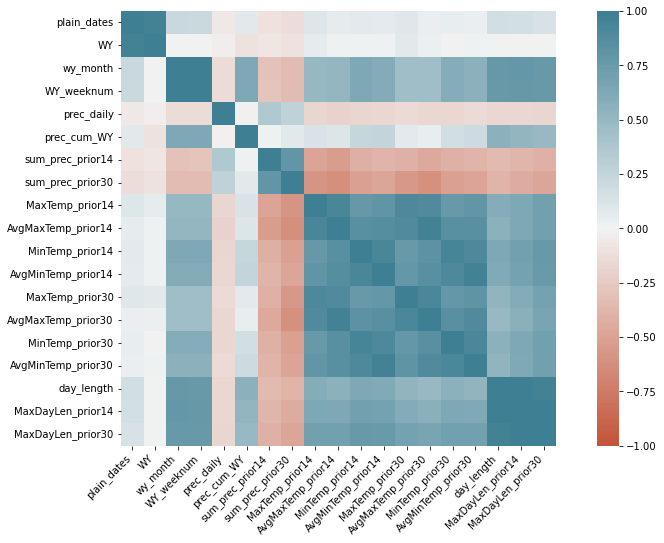

In [24]:
corr = vars_corr.corr()
plt.figure(figsize = (15,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Summary:**
<br>- Precipitation and temperature have a somewhat negative correlation, as expected (rain in winter).
<br>- Sum of precipitation in prior 14 is not correlated to cumulative annual precipitation.
<br>- Daylength looks lightly negatively correlated with sum of precipitation and poitively correlated with temperature.
<br>- Daylength values daily, 14 day, and 30 day all behave similarly.
<br>- The 14 and 30 day periods of same feature are fairly positively correlated, as expected
<br>
<br>**Model feature combinations**
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior30', 'MinTemp_prior30'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior30', 'MaxTemp_prior14', 'MinTemp_prior14'
<br>- 'prec_cum_WY', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior30', 'MinTemp_prior30'


[Link to top](#top)
<a id='between_park'></a>

### 3b. between park variation in climate

**maximum temperature in each wateryear-week**

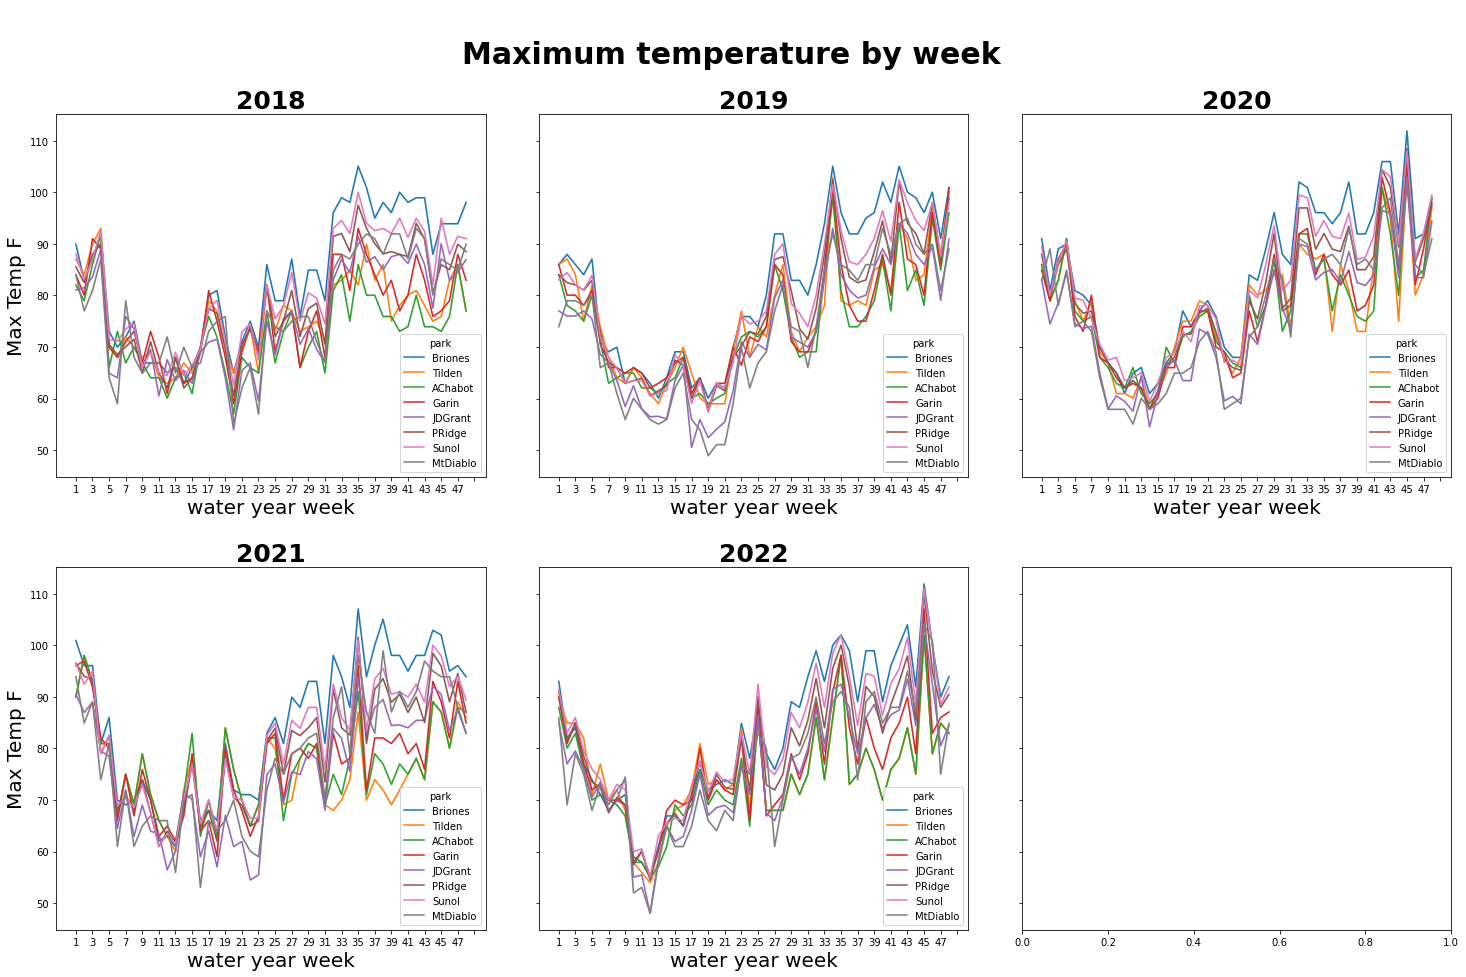

In [25]:
#Maximum temperature in each water year, all parks
features = ['WkMaxTemp', 'WkMinTemp', 'WkCumPrec']
parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]

ax_cols = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1, 2)]

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharey=True)
fig.subplots_adjust(hspace=0.25, wspace=0.125)
fig.suptitle(' \nMaximum temperature by week\n ', fontsize = 30, weight='bold')

for y, a in zip(years, ax_cols):
    sns.lineplot(data = df[df['WY']==y],ax=axes[a], x = "WY_weeknum_str", y="WkMaxTemp", hue='park')
    axes[a].set_title(y, fontsize = 25, weight='bold')
    axes[a].set_xlabel("water year week", fontsize = 20)
    axes[a].set_ylabel("Max Temp F", fontsize = 20)
    axes[a].set_xticks(np.arange(0,50,2))

**minimum temperature in each wateryear-week**

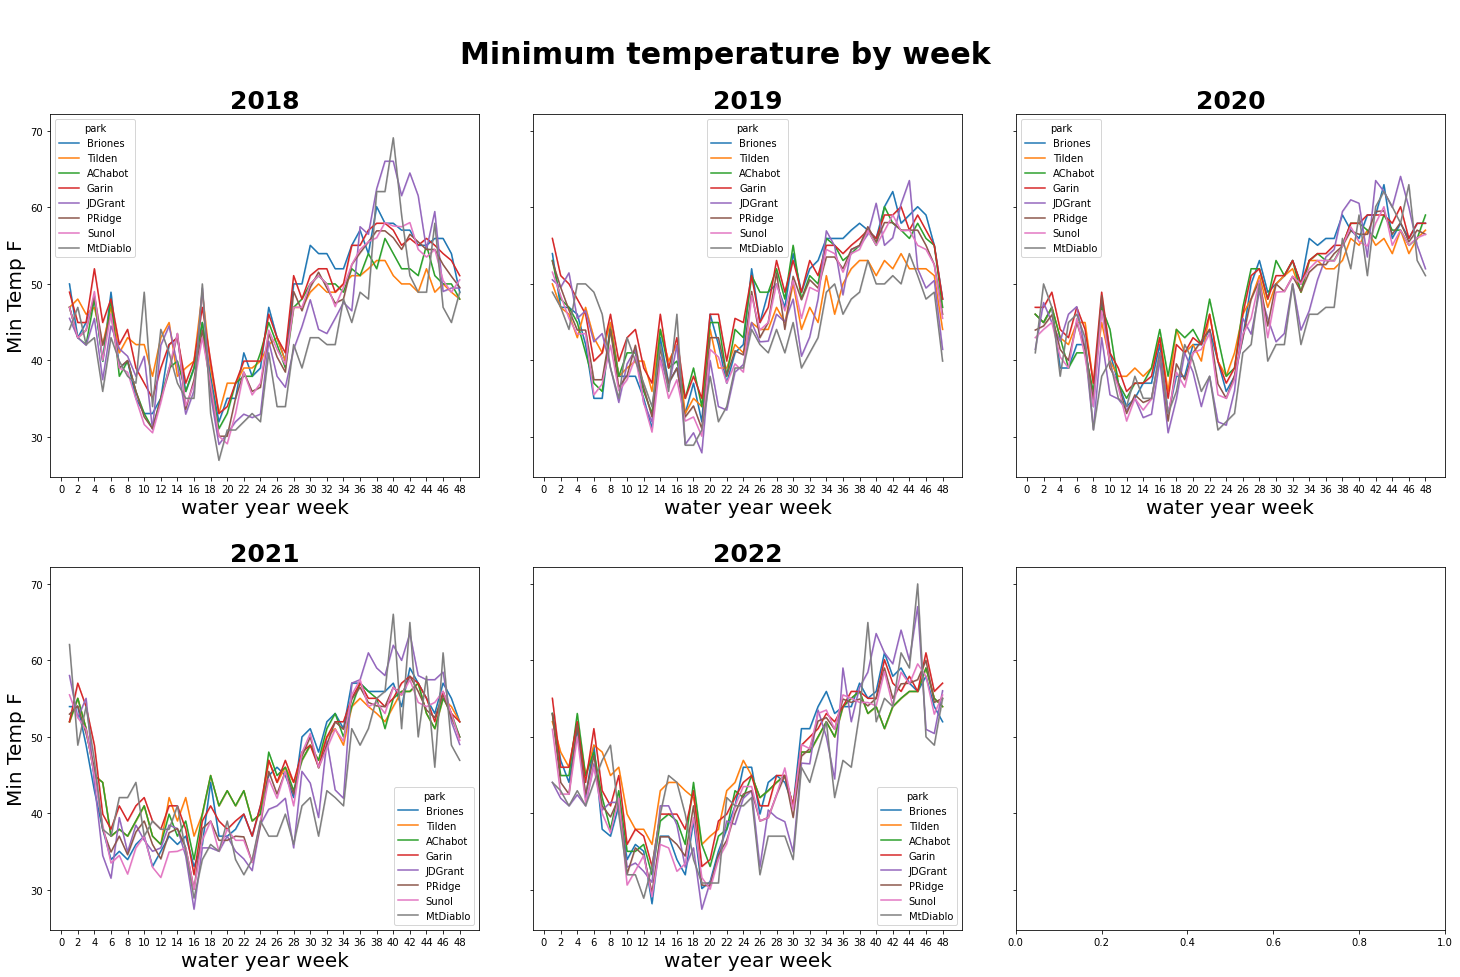

In [26]:
#Minimum temperature in each water year, all parks
features = ['WkMaxTemp', 'WkMinTemp', 'WkCumPrec']
parks = ['AnthonyChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]

ax_cols = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1, 2)]

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharey=True)
fig.subplots_adjust(hspace=0.25, wspace=0.125)
fig.suptitle('\nMinimum temperature by week', fontsize = 30, weight='bold')

for y, a in zip(years, ax_cols):
    sns.lineplot(data = df[df['WY']==y],ax=axes[a], x = "WY_weeknum", y="WkMinTemp", hue='park')
    axes[a].set_title(y, fontsize = 25, weight='bold')
    axes[a].set_xlabel("water year week", fontsize = 20)
    axes[a].set_ylabel("Min Temp F", fontsize = 20)
    axes[a].set_xticks(np.arange(0,50,2))
    

**cumulative precipitation in each wateryear-week**

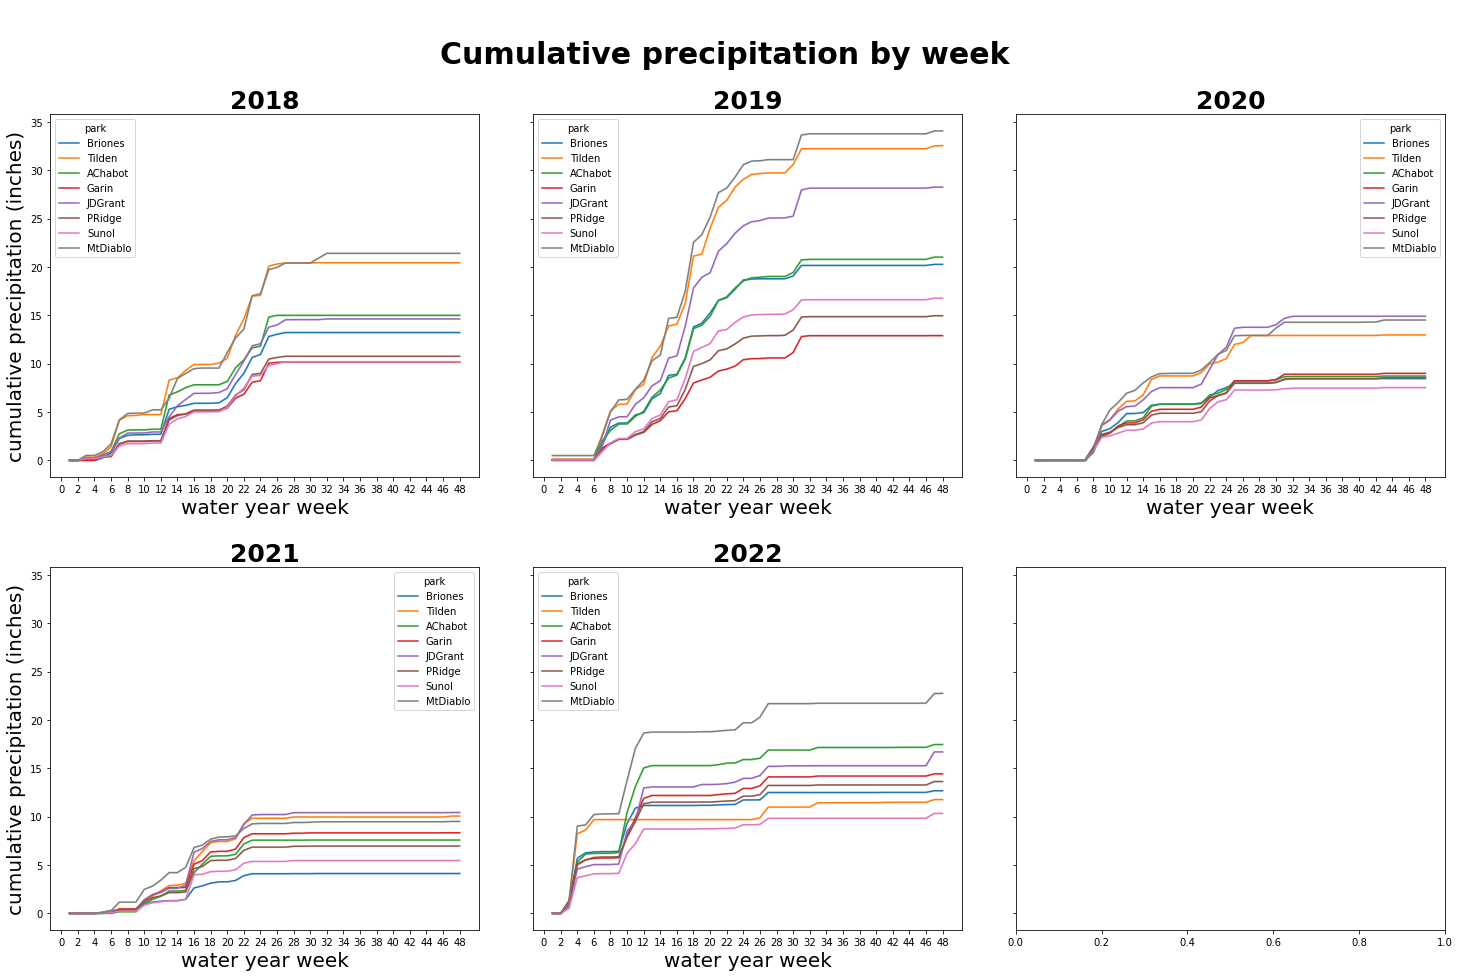

In [27]:
#Cumulative precipitation in each water year, all parks
features = ['WkMaxTemp', 'WkMinTemp', 'WkCumPrec']
parks = ['AnthonyChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]

ax_cols = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1, 2)]

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharey=True)
fig.subplots_adjust(hspace=0.25, wspace=0.125)
fig.suptitle(' \nCumulative precipitation by week', fontsize=30, weight='bold')

for y, a in zip(years, ax_cols):
    sns.lineplot(data = df[df['WY']==y],ax=axes[a], x = "WY_weeknum", y="WkCumPrec", hue='park')
    axes[a].set_title(y,fontsize = 25, weight='bold')
    axes[a].set_xlabel("water year week", fontsize = 20)
    axes[a].set_ylabel("cumulative precipitation (inches)", fontsize = 20)
    axes[a].set_xticks(np.arange(0,50,2))

**daylength**

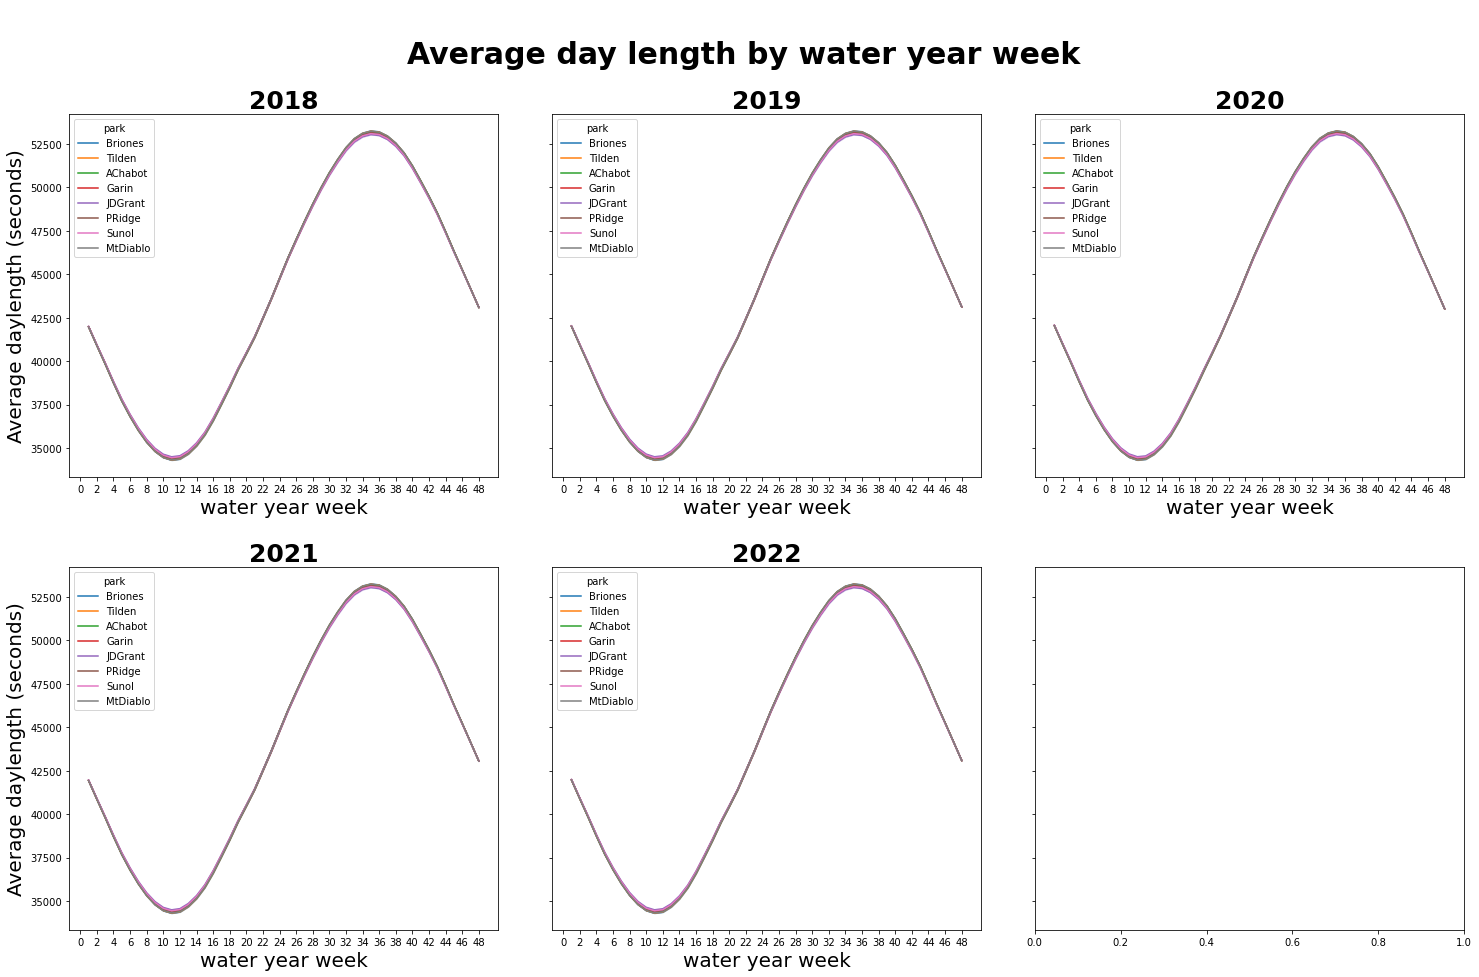

In [28]:
#Daylength temperature in each water year, all parks
features = ['WkMaxTemp', 'WkMinTemp', 'WkCumPrec']
parks = ['AnthonyChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]

ax_cols = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1, 2)]

fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharey=True)
fig.subplots_adjust(hspace=0.25, wspace=0.125)
fig.suptitle(' \nAverage day length by water year week', fontsize=30, weight='bold')

for y, a in zip(years, ax_cols):
    sns.lineplot(data = df[df['WY']==y],ax=axes[a], x = "WY_weeknum", y="WkAvgDayLen", hue='park')
    axes[a].set_title(y,fontsize = 25, weight='bold')
    axes[a].set_xlabel("water year week", fontsize = 20)
    axes[a].set_ylabel("Average daylength (seconds)", fontsize = 20)
    axes[a].set_xticks(np.arange(0,50,2))

[Link to top](#top)
<a id='temp_study_period'></a>

### 3c. variation in temperature across study period

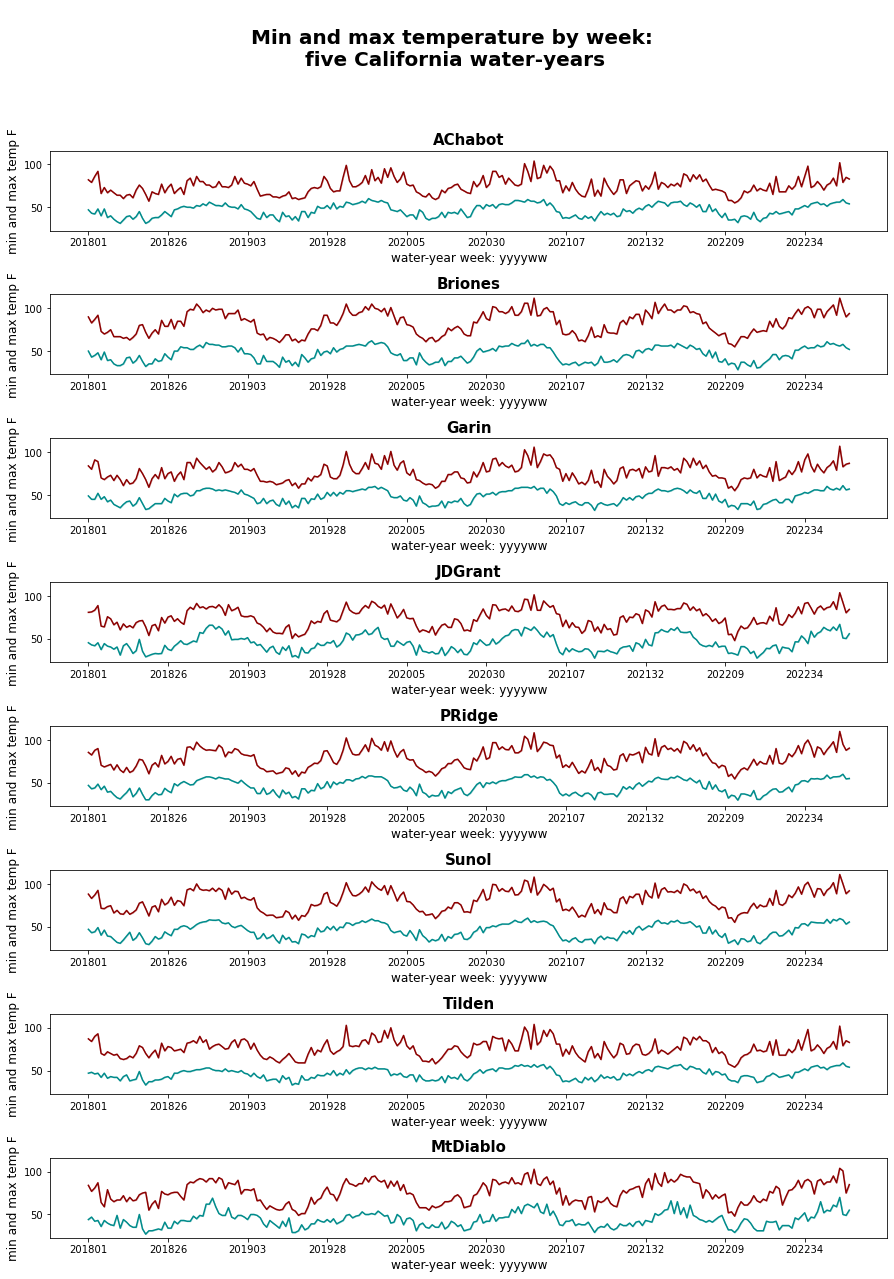

In [29]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nMin and max temperature by week: \nfive California water-years', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="WkMaxTemp", color='darkred')
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="WkMinTemp", color='darkcyan')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("min and max temp F", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))


**average temperature over prior 14 days**

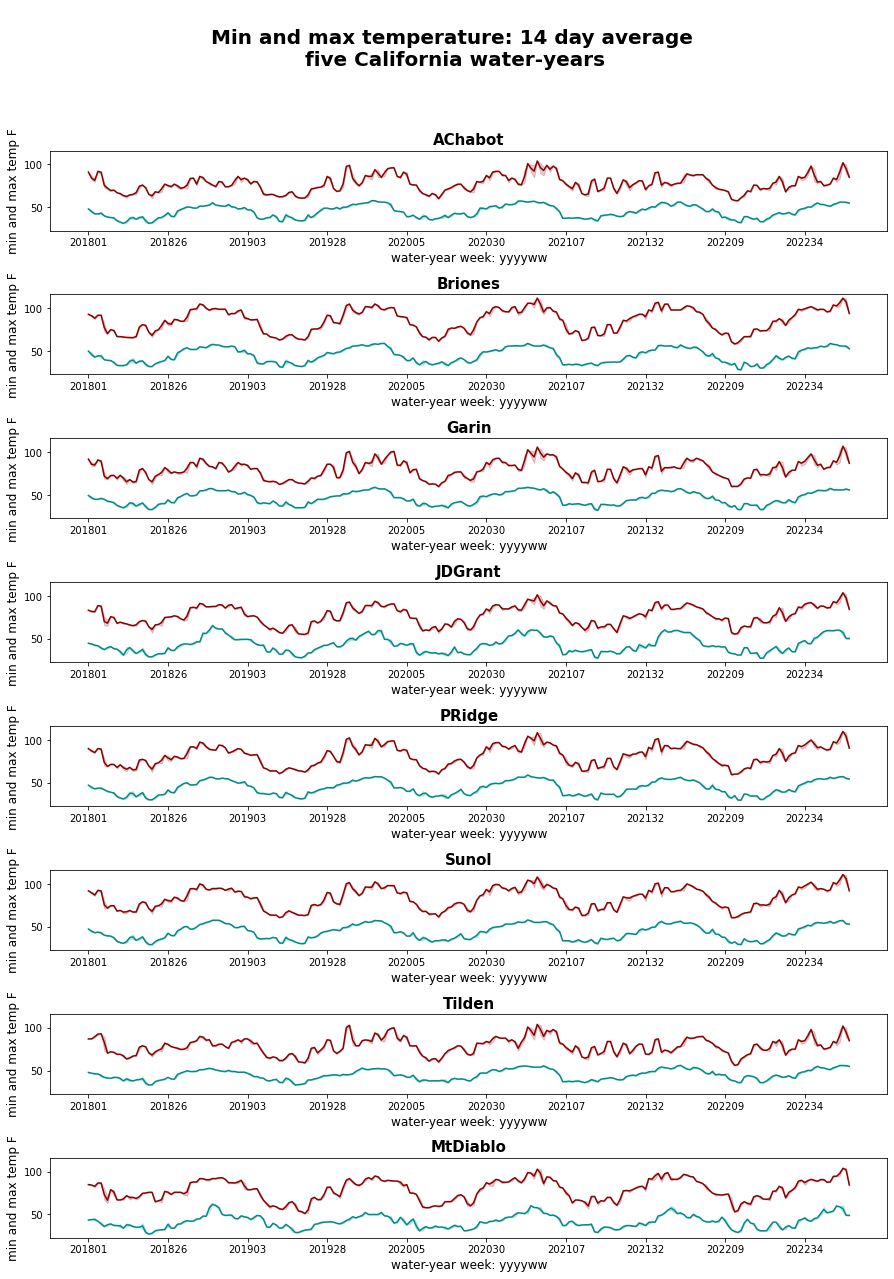

In [30]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nMin and max temperature: 14 day average \nfive California water-years', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MaxTemp_prior14', color='darkred')
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MinTemp_prior14', color='darkcyan')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("min and max temp F", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))




**average temperature over prior 30 days**

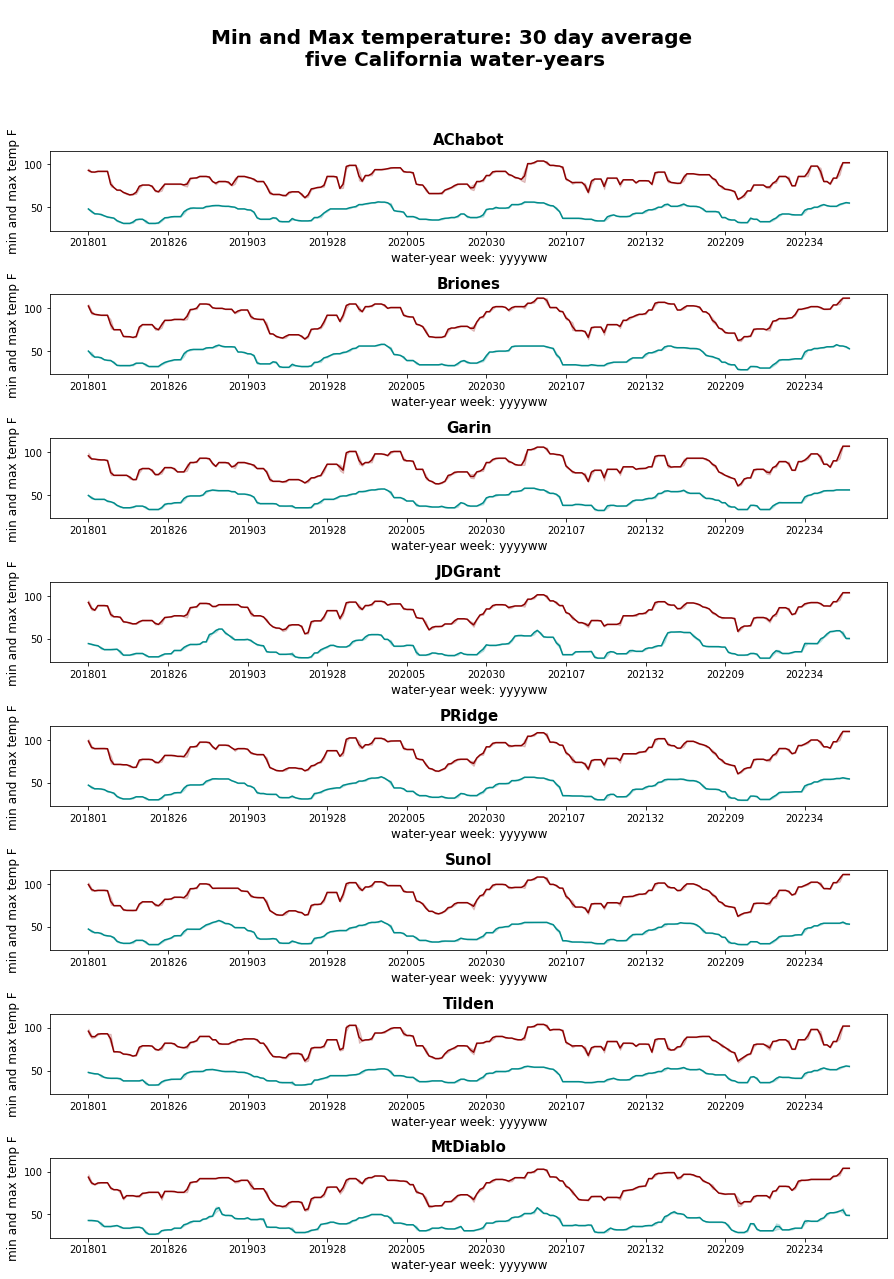

In [31]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nMin and Max temperature: 30 day average \nfive California water-years', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MaxTemp_prior30', color='darkred')
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='MinTemp_prior30', color='darkcyan')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("min and max temp F", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))




[Link to top](#top)
<a id='precip_study_period'></a>

### 3d. variation in precipitation over study period

**daily precipitation**

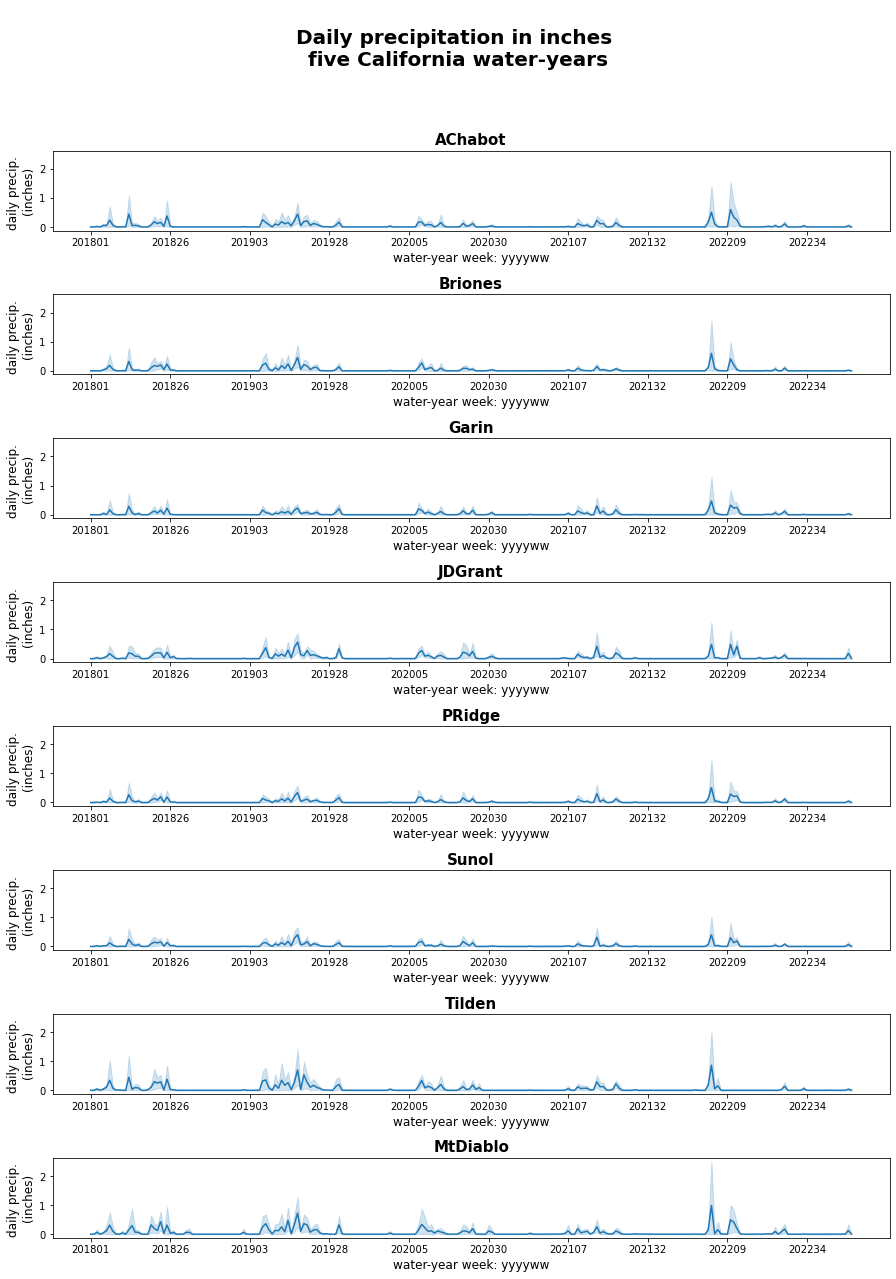

In [32]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nDaily precipitation in inches \nfive California water-years', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='prec_daily')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("daily precip. \n(inches)", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))

**cumulative precipitation over prior 14 days**

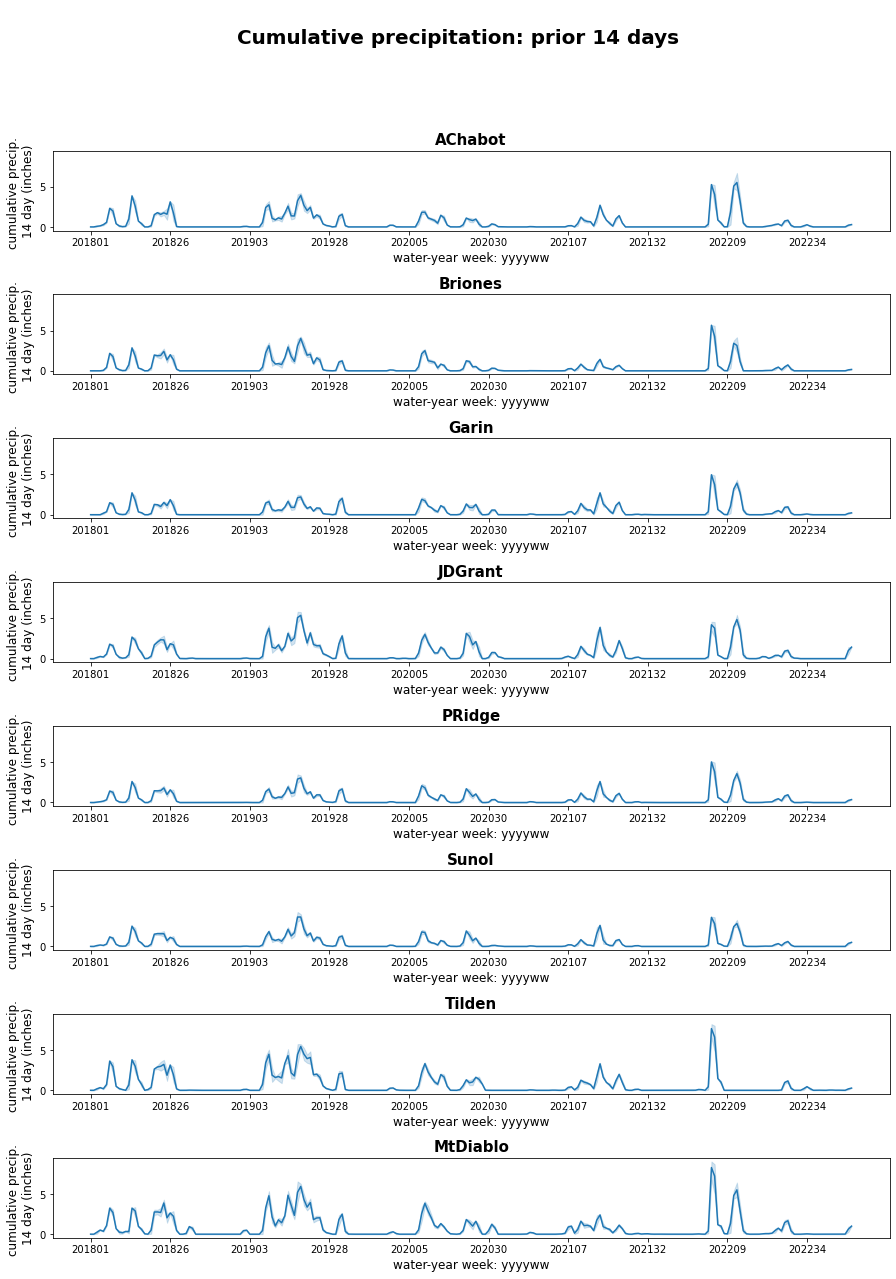

In [33]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nCumulative precipitation: prior 14 days', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='sum_prec_prior14')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("cumulative precip. \n14 day (inches)", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))

**cumulative precipitation over prior 30 days**

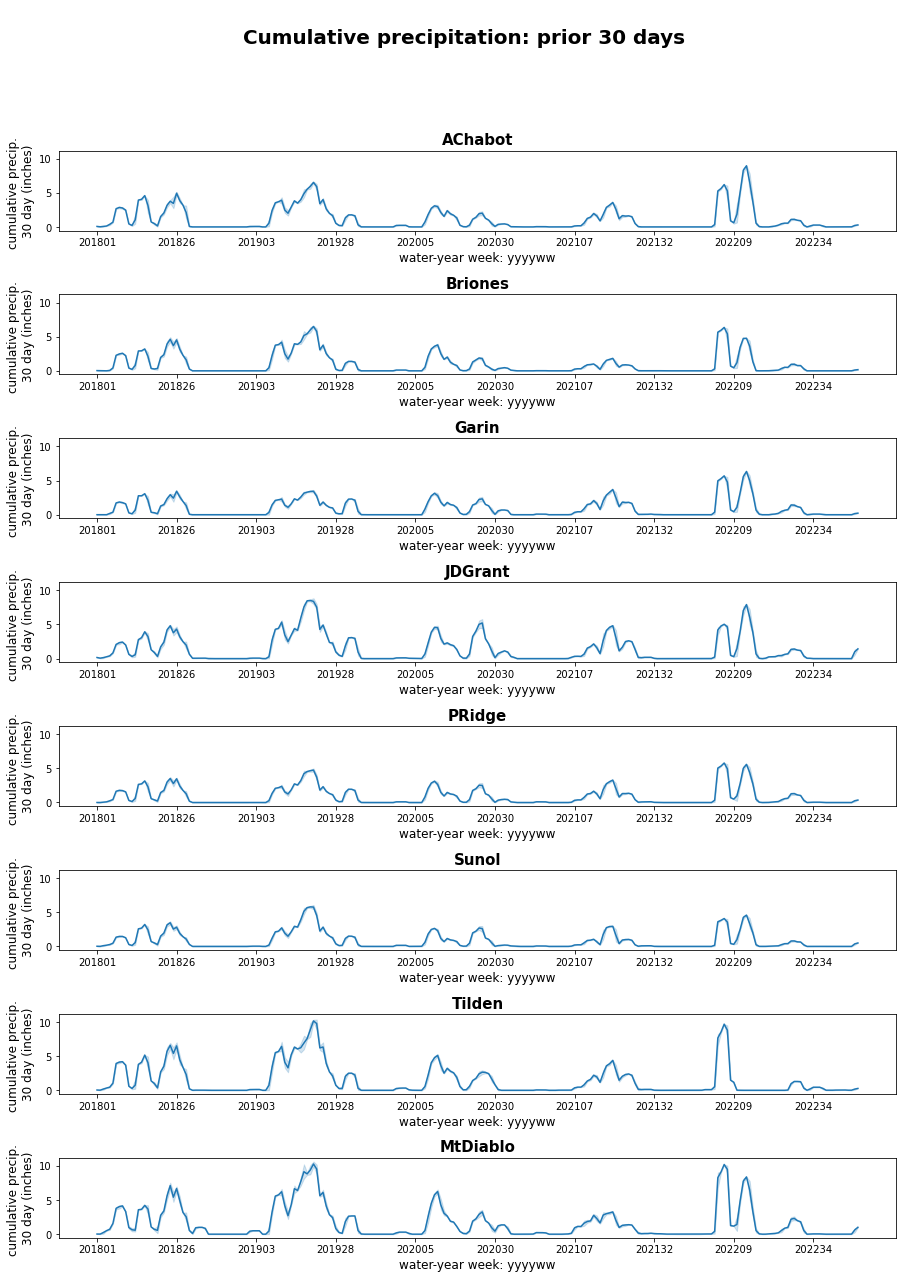

In [34]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nCumulative precipitation: prior 30 days', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y='sum_prec_prior30')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("cumulative precip. \n30 day (inches)", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))

[Link to top](#top)
<a id='day_study_period'></a>

### 3e. daylength over the study period

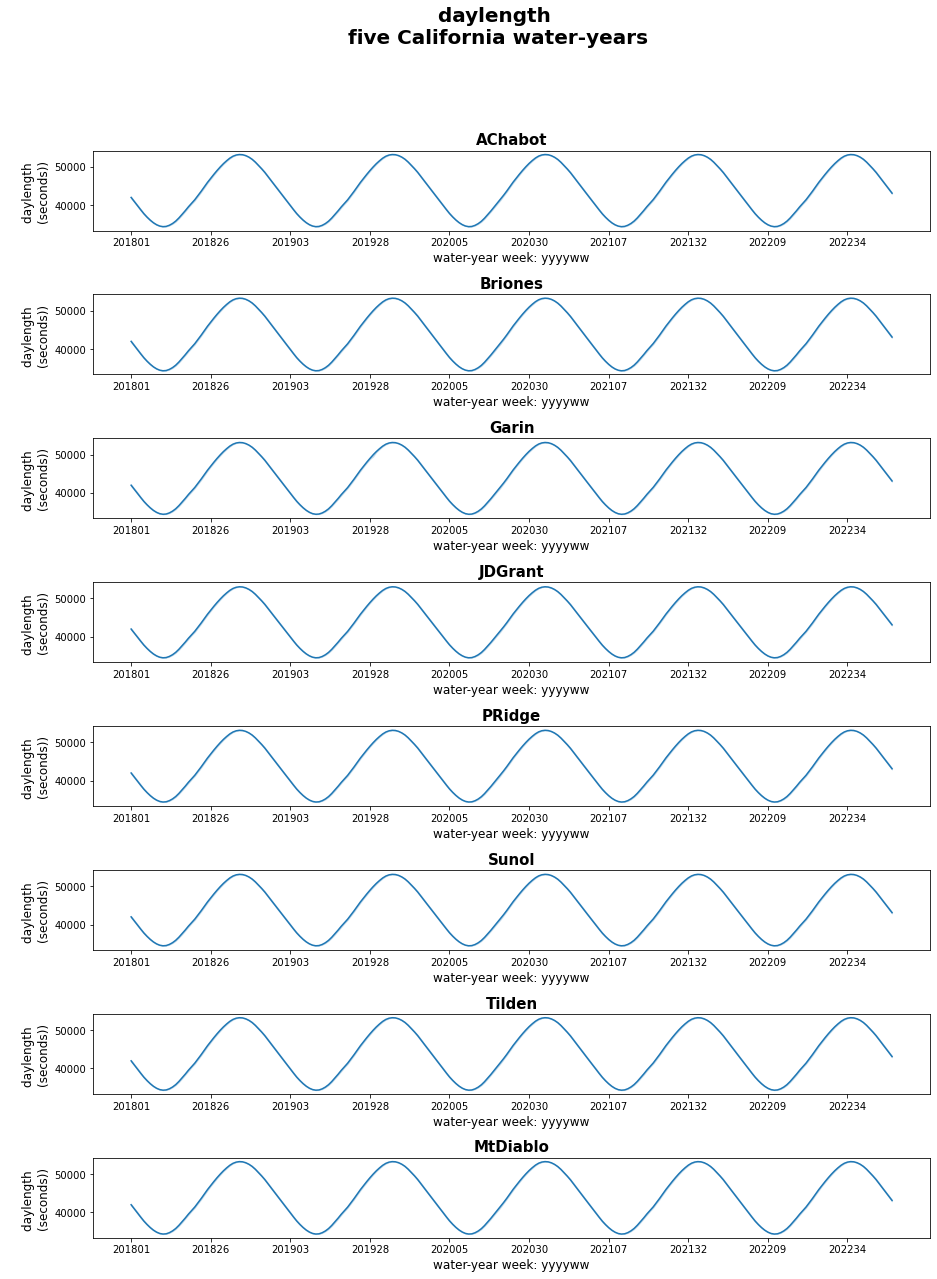

In [35]:
#single park, single variable, each week by water year

parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge',
       'Sunol', 'Tilden', 'MtDiablo']
ax_cols1 = range(len(parks))


fig, axes = plt.subplots(8, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('daylength \nfive California water-years', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.lineplot(ax=axes[a], data = df[df['park']== p], x = "WYwk_yr_str", y="day_length")
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("water-year week: yyyyww", fontsize = 12)
    axes[a].set_ylabel("\ndaylength \n(seconds))", fontsize = 12)
    axes[a].set_xticks(np.arange(0,250,25))